# Mode-Turbulence Coupling: Numerical Analysis

In [140]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [141]:
from scipy import integrate
import random
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import math

## Generate delta T

#### To generate values for deta T, I created a Poisson Distribution centered at 2*pi. I then randomly choose values from the Poisson Distribution. These values are delta T's.

### Poisson Distribution
#### Source: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.poisson.html

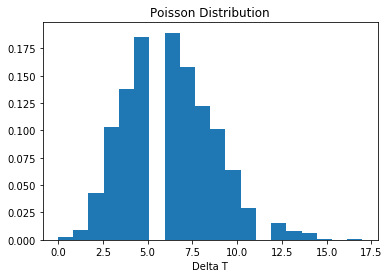

In [155]:
poisson = np.random.poisson(2*np.pi, 1000)
count, bins, ignored = plt.hist(poisson, 20, density=True)
plt.title("Poisson Distribution")
plt.xlabel("Delta T")
plt.show()

In [159]:
# delta T is generated by randomly choosing a value from the Poisson Distribution
length=10
deltaT=[]
for i in range(length):
    deltaT.append(random.choice(poisson))
print("Delta T values are:", deltaT)

Delta T values are: [9, 7, 6, 9, 2, 4, 8, 9, 6, 11]


In [160]:
# Tturb adds up the delta T's
Tturb=[0]
for i in range(len(deltaT)-1):
    Tturb.append(deltaT[i]+Tturb[i])
print("Tturb values are:", Tturb)

Tturb values are: [0, 9, 16, 22, 31, 33, 37, 45, 54, 60]


In [161]:
# t is the sum of half way points of consecutive delta T's
t=[]
for i in range(len(deltaT)-1):
    t.append((deltaT[i])/2+(deltaT[i+1])/2)
print("t values are:", t)

t values are: [8.0, 6.5, 7.5, 5.5, 3.0, 6.0, 8.5, 7.5, 8.5]


## Generate F1
#### To generate F1, I generate a new Gaussian Markov Distribution for each time t. I then integrate the Gaussian Markov Distribution and randomly choose a value within that integral. That value is F1. At the end, I have a list of F1 values that correspond to different times t.

### Gaussian Markov Distribution

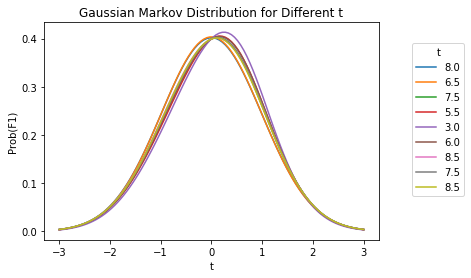

In [162]:
mean = 0
std = .3
Tr=2*np.pi
x = np.linspace(-3,3,100)

prob=[0]
vart=[]
meant=[]

#vart is the time-dependent variance
#meant is the time-dependent mean

for i in range(len(t)):
    a=t[i]
    vart=(1-math.exp(-2*a/Tr)*std**2)
    meant=(mean+math.exp(-a/Tr)*(prob[i-1]-mean))
    prob.append(scipy.stats.norm.pdf(x, meant, vart))
    plt.plot(x,(scipy.stats.norm.pdf(x, meant, vart)))
    
#in this loop, a new variance (standard devˆ2), mean, and probability distribution is calculated for each time t
    
plt.title("Gaussian Markov Distribution for Different t")
plt.legend(labels=t, loc=(1.1,0.2), title="t")
plt.xlabel("t")
plt.ylabel("Prob(F1)")

prob.remove(prob[0])

### Integratral of Gaussian Markov Distribution for Different t

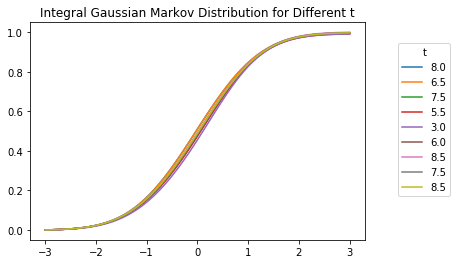

In [163]:
integral=[]

tt=np.linspace(-3, 3, 100)

for element in prob:
    integral.append(scipy.integrate.cumtrapz(element, tt))

ttt=np.linspace(-3, 3, 99)
for element in integral:
    plt.plot(ttt,element)

plt.title("Integral Gaussian Markov Distribution for Different t")
plt.legend(labels=t, loc=(1.1,0.2), title="t")

### Random Number Generator to Obtain F1

In [165]:
F1=[]
for element in prob:
    ran=random.choice(element)
    F1.append(ran)
print("F1 values are ", F1)

F1 values are  [0.01183603369468614, 0.08770782799080132, 0.372335750567991, 0.05040515693056788, 0.011485278317886526, 0.37870020971096574, 0.094851646961317, 0.159205734136015, 0.006027281251443056]


## Generate F2
#### To generate F2, I generate a new Gaussian Markov Distribution for each time t. I then integrate the Gaussian Markov Distribution and randomly choose a value within that integral. That value is F1. At the end, I have a list of F1 values that correspond to different times t.

### Gaussian Markov Distribution

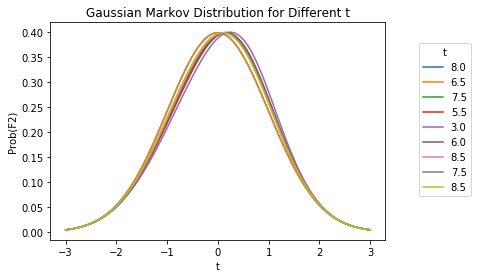

In [166]:
mean = 0
std =.09
x = np.linspace(-3,3,100)
Tr=2*np.pi

prob=[0]
vart=[]
meant=[]

#vart is the time-dependent variance
#meant is the time-dependent mean

for i in range(len(t)):
    a=t[i]
    vart=(1-math.exp(-2*a/Tr)*std**2)
    meant=(mean+math.exp(-a/Tr)*(prob[i-1]-mean))
    prob.append(scipy.stats.norm.pdf(x, meant, vart))
    plt.plot(x,(scipy.stats.norm.pdf(x, meant, vart)),)

plt.title("Gaussian Markov Distribution for Different t")
plt.legend(labels=t, loc=(1.1,0.2), title="t")
plt.xlabel("t")
plt.ylabel("Prob(F2)")

prob.remove(prob[0])

### Integratral of Gaussian Markov Distribution for Different t

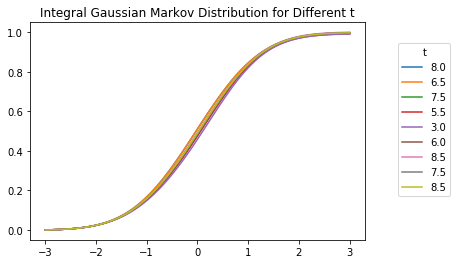

In [167]:
integral=[]

tt=np.linspace(-3, 3, 100)

for element in prob:
    integral.append(scipy.integrate.cumtrapz(element, tt))

ttt=np.linspace(-3, 3, 99)
for element in integral:
    plt.plot(ttt,element)

plt.title("Integral Gaussian Markov Distribution for Different t")
plt.legend(labels=t, loc=(1.1,0.2), title="t")

### Random Number Generator

In [168]:
F2=[]
for element in prob:
    ran=random.choice(element)
    F2.append(ran)
print("F2 values are ", F2)

F2 values are  [0.09936481097991576, 0.39916717121028367, 0.01983065127406681, 0.01053712564022947, 0.2208630680716801, 0.022136845670437555, 0.12742106618775803, 0.05928748716522445, 0.30869622586469203]


## Generate G1
#### To Generate G1, I take the derivative of F1 by taking the difference of F1 values at times halfway between consecutive delta T's and divide that by the difference in those times.

In [170]:
G1=[]
for i in range(len(F1)-1):
    G1.append((F1[i]-F1[i+1])/(deltaT[i]+deltaT[i+1]))
print("G1 values are ", G1)

G1 values are  [-0.004741987143507199, -0.021894455582860746, 0.02146203957582821, 0.0035381707829710324, -0.0612024885655132, 0.023654046895804064, -0.0037855345396881172, 0.010211896858971463]


# Everything below this point is not finished.

## During delta T, take V(T) to be constant

In [102]:
#F2=constant=c
#1+G1=constant=b
#F1=constant=a

[0.001942489390189693, 0.0016214638483916053, -5.0077600502723e-07, -0.0027658812891505425, -0.0025652953557421415, -0.0028239613295381453, -0.01877722995414063, 0.008374573416664281]
0.0068675519309677625
-0.10794666787150367
-0.08165307851553313
-0.07781138435346427
-0.010280254755685975
-0.011352311508110825
-0.1317384007666572
0.032786042821409934


/Users/celiatandon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Text(0.5, 1.0, 'Amplitude')

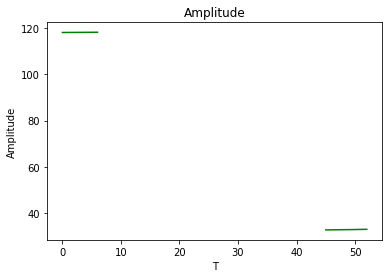

In [138]:
A=[]
t=[]

for i in range(len(Tturb)-2):
    a=F1[i]
    b=G1[i]
    c=F2[i]
    print(4*b-a**2)
    Ttemp=np.linspace(Tturb[i], Tturb[i+1])
    for j in Ttemp:
        t.append(j)
        A.append(math.exp(-a*j/2)*(math.sin(1/2*(4*b-a**2)**(1/2)*j)+math.cos(1/2*(4*b-a**2)**(1/2)*j))+c/b)

plt.plot(t, A, 'g')
plt.xlabel('T')
plt.ylabel('Amplitude')
plt.title('Amplitude')